# ⼩结
• 我们可以从概率分布中采样。    
• 我们可以使⽤联合分布、条件分布、Bayes定理、边缘化和独⽴性假设来分析多个随机变量。    
• 期望和⽅差为概率分布的关键特征的概括提供了实⽤的度量形式。

# 练习
1. 进⾏m = 500组实验，每组抽取n = 10个样本。改变m和n，观察和分析实验结果。
2. 给定两个概率为P(A)和P(B)的事件，计算P(A ∪ B)和P(A ∩ B)的上限和下限。（提⽰：使⽤友元图来展⽰这些情况。)
3. 假设我们有⼀系列随机变量，例如A、B和C，其中B只依赖于A，而C只依赖于B，你能简化联合概率P(A, B, C)吗？（提⽰：这是⼀个⻢尔可夫链。)
4. 在 2.6.2节中，第⼀个测试更准确。为什么不运⾏第⼀个测试两次，而是同时运⾏第⼀个和第⼆个测试?

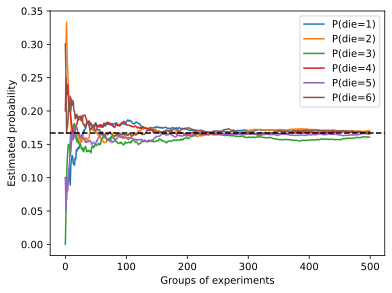

In [8]:
#1
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
        label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

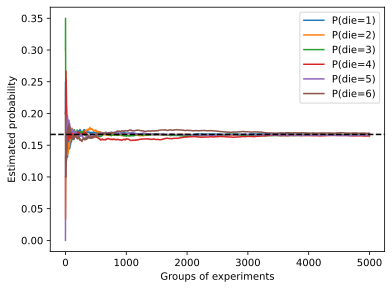

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((5000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
        label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

对比以上结果可知，第一张图效果更好，更加趋近于 0.167。原因可能是第二张图实验组数为 5000 组，而第一张图只有 500 组，虽然两者总实验次数相同，但是第二张图的实验组数要更多一些。考虑到每一组都可能存在偏差，实验组数越多，实验偏差就会分布的更加平均，效果就会更好。

#2
对于 P ( A ∪ B )，上限是 P(A) + P(B)，下限是 max{P(A), P(B)}。

对于P ( A ∩ B ），上限是 min{P(A), P(B)}，下限是 0。

#3
P(A, B, C) = P(A) P(B|A) P(C|B)

#4
第四题中因为第一个测试和第二个测试具有不同的特性，所以可以假定它们条件独立来计算患者真实患病的概率。而测试一和它本身显然是条件不独立的（不能使用bayes定理计算必要概率），而且具有很强的相关关系，因此连续做两次测试一不能更好地判断病人是否患病。

另外我觉得是因为使用同一种测试的话，如果没有随机因素的干扰或者测试流程的问题，结果应该是不会变的，所以大概率结果相同，第二次测试就没什么意义。使用不同的测试，可以避免这个问题。